### Import Modules

In [ ]:
#https://radimrehurek.com/gensim/models/lsimodel.html
#https://github.com/zeina99/topic-modeling/blob/master/topic-modeling-lsi-lda-hdp.ipynb
#https://medium.com/@zeina.thabet/topic-modeling-with-lsi-lda-and-document-clustering-with-carrot2-part-1-5b1fbec737f6

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
coursedata = pd.read_csv("/content/drive/MyDrive/DSCI:560 Project/Datasets/coursera_data_course_level.csv")
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,Approx. 20 hours to complete,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,Approx. 20 hours to complete,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,Approx. 11 hours to complete,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,Approx. 28 hours to complete,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


### Data Summary


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_title      6134 non-null   object
 1   difficulty_level  4736 non-null   object
 2   duration          6096 non-null   object
 3   skills            6636 non-null   object
 4   instructors       6636 non-null   object
 5   description       6635 non-null   object
 6   rating            4651 non-null   object
 7   offered_by        6636 non-null   object
 8   language          6636 non-null   object
 9   syllabus_heading  6636 non-null   object
 10  syllabus_details  6636 non-null   object
dtypes: object(11)
memory usage: 570.4+ KB


In [ ]:
coursedata.describe()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
count,6134,4736,6096,6636,6636,6635,4651,6636,6636,6636,6636
unique,6117,3,85,2990,3159,6126,21,261,21,5943,5440
top,Leadership,Beginner Level,Approx. 12 hours to complete,[],[],We help millions of organizations empower thei...,4.8\nstars,Google Cloud,English,[],[]
freq,3,3057,330,3437,504,502,1186,739,4824,540,539


In [ ]:
coursedata.columns

Index(['course_title', 'difficulty_level', 'duration', 'skills', 'instructors', 'description', 'rating', 'offered_by', 'language', 'syllabus_heading', 'syllabus_details'], dtype='object')

In [ ]:
coursedata.dtypes

course_title        object
difficulty_level    object
duration            object
skills              object
instructors         object
description         object
rating              object
offered_by          object
language            object
syllabus_heading    object
syllabus_details    object
dtype: object

### Data Preprocessing

In [ ]:
coursedata['difficulty_level'].value_counts()

Beginner Level        3057
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
coursedata.shape

(6636, 11)

In [ ]:
#Replace NAN values intially with "0"
#Extracting hours 
#Replaces "0" with median value
coursedata['duration'].fillna("0",inplace=True)
coursedata['duration'].value_counts().sum()

6636

In [ ]:
hours = coursedata['duration'].astype('str').str.extractall('(\d+)').unstack().sum(axis=1).astype(int)
coursedata['duration'] = hours
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].shape

(6636,)

In [ ]:
print(coursedata['duration'].median())

13.0


In [ ]:
# coursedata['duration'].value_counts()

In [ ]:

coursedata['duration']=coursedata['duration'].replace(0,int(coursedata['duration'].median()))
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].value_counts()

13     859
12     330
10     329
9      314
11     311
15     297
14     289
8      277
16     243
7      236
6      230
18     230
19     212
17     209
20     202
22     161
5      158
21     147
2      141
4      138
23     125
25     114
24     100
27      96
3       96
26      94
28      76
29      63
33      54
31      51
32      47
30      47
35      34
1       30
34      27
40      27
38      25
37      21
47      17
42      15
36      15
46      12
41      10
39      10
44       9
43       9
45       9
54       7
49       7
66       6
53       5
60       5
55       4
56       4
71       4
48       3
59       3
65       3
50       3
93       2
69       2
51       2
72       2
57       2
73       2
63       2
61       2
67       2
76       2
81       1
58       1
96       1
104      1
80       1
68       1
90       1
64       1
78       1
106      1
85       1
88       1
310      1
62       1
70       1
127      1
Name: duration, dtype: int64

In [ ]:
coursedata['difficulty_level'].isnull().sum()

1900

In [ ]:
#@title
#Replacing blank values of difficulty level with Unknown 
coursedata["difficulty_level"].fillna("Unknown", inplace = True)
coursedata["difficulty_level"].value_counts()

Beginner Level        3057
Unknown               1900
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
diff_lvl_dict = {'Beginner Level':1 , 'Intermediate Level':2, 'Advanced Level':3, 'Unknown':0}
coursedata['numeric_difficulty_lvl'] = coursedata.difficulty_level.map(diff_lvl_dict)
coursedata['numeric_difficulty_lvl'].value_counts()

1    3057
0    1900
2    1489
3     190
Name: numeric_difficulty_lvl, dtype: int64

In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 622.2+ KB


Text(0.5, 1.0, 'NUMBER OF COURSES FOR DIFFERENT DURATION')

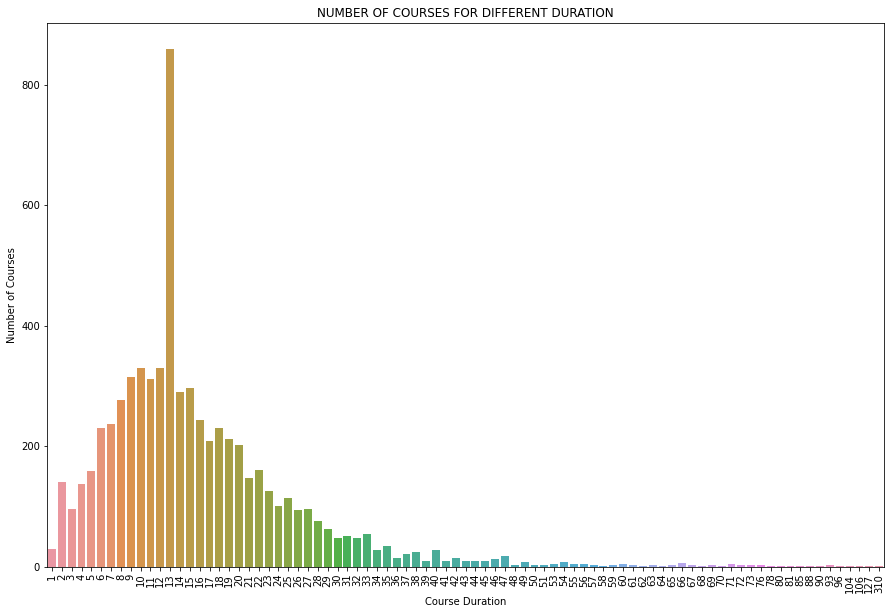

In [ ]:
#Course Duration Distribution throughout the data
#Rating Distribution throughout the data
import seaborn as sns
plt.figure(figsize=(15,10)) 
sns.countplot(x='duration', data=coursedata)
plt.xlabel('Course Duration')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('NUMBER OF COURSES FOR DIFFERENT DURATION')  

In [ ]:
def label_race (row):
   if row['duration'] <= 10 :
      return 'Short Course Duration'
   if row['duration'] > 10 and row['duration'] <= 35 :
      return 'Medium Course  Duration'
   if row['duration'] >35 and row['duration'] <=70 :
      return 'Long Course Duration'
   if row['duration'] >70  :
      return 'Very Long Course Duration'

In [ ]:
coursedata['duration_label'] = coursedata.apply (lambda row: label_race(row), axis=1)

In [ ]:
coursedata["duration_label"].value_counts()

Medium Course  Duration      4418
Short Course Duration        1949
Long Course Duration          246
Very Long Course Duration      23
Name: duration_label, dtype: int64

In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
 12  duration_label          6636 non-null   object
dtypes: int64(2), object(11)
memory usage: 674.1+ KB


In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1,Medium Course Duration
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1,Medium Course Duration
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1,Medium Course Duration
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1,Medium Course Duration
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1,Medium Course Duration


In [ ]:
coursedata['combined_text'] = coursedata["course_title"] + " $ " + coursedata["difficulty_level"] + " $ " + coursedata["skills"] + " $ " + coursedata["instructors"] +  " $ " + \
                              coursedata["description"] + " $ " + coursedata["offered_by"] + " $ " + coursedata["language"] + " $ " + coursedata["syllabus_heading"] + " $ " + \
                              coursedata["syllabus_details"] + " $ " + coursedata["duration_label"]
coursedata['combined_text'][0]

'Cloud Computing Concepts, Part 1 $ Beginner Level $ [\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'] $ [\'Indranil Gupta\'] $ Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews with leadi

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from langdetect import detect
def detect_language(row):
   lang = str(detect(str(row['combined_text'])))
   return lang
coursedata['language'] = coursedata.apply (lambda row: detect_language(row), axis=1)
coursedata.language.value_counts()

en       4419
es        656
tl        503
pt        253
ar        230
fr        222
zh-cn      63
de         53
ja         49
ru         48
ko         47
it         18
id         17
uk         13
tr         12
hi         11
zh-tw      10
he          6
hu          2
vi          2
sv          1
no          1
Name: language, dtype: int64

In [ ]:
coursedata = coursedata[coursedata['language']=='en']

#Data Cleaning

In [ ]:
#Importing Necessary Libraries for Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LsiModel, LdaModel

from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from nltk.corpus import wordnet
# method used to get the correct pos tag for correct lemmatization since nltk assumes all words are nouns which results in wrong lemmatization without specifying the correct pos
def get_pos(word):
    # WordNet Lemmatizer needs a pos to correctly lemmatize words. 
    # WordNet accepts pos in formats: 'wordnet.NOUN' 'wordnet.VERB' 'wordnet.ADJ' 'wordnet.ADV' for noun, verb, adj, adverb, respectively
    # to map nltk pos tags to wordnet pos tags we get the first letter out of the nltk pos tag and map it to a wordnet tag

    # get the nltk pos tag 
    pos = nltk.pos_tag([word])
    #outputs: [('playing', 'VBG')]

    # get the first letter of the nltk pos tag
    pos = pos[0][1][0]

    pos_tags = {
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "J": wordnet.ADJ,
        "R": wordnet.ADV,
        "default": wordnet.NOUN
    }
    # if the pos tag doesnt match any key, return wordnet.NOUN as a default
    return pos_tags.get(pos, pos_tags['default'])
    

In [ ]:
def clean_text(document):
    #Remove URL
    document = re.sub(r'https?://\S+|www\.\S+', " ", document)

    #Remove Mentions
    document = re.sub(r'@\w+',' ',document)

    #Remove Punctuation
    document= re.sub(r'[^\w\s\d\$]',' ',document)

    #Remove HTML tags
    document = re.sub('r<.*?>',' ', document)

    #Remove Hastags
    document = re.sub(r'#\w+', ' ', document)
    
    document = " ".join([word for word in document.split() if word not in stop_words])
    
    # document = " ".join([WordNetLemmatizer().lemmatize(word, get_pos(word)) for word in document.split()])

    return document

In [ ]:
word = WordNetLemmatizer().lemmatize('being', pos=wordnet.VERB)
word

'be'

In [ ]:
# apply the method on the documents column
coursedata['clean_combined_text'] = coursedata['combined_text'].astype(str).apply(lambda x: clean_text(x))

In [ ]:
coursedata['clean_combined_text'][0]

'Cloud Computing Concepts Part 1 $ Beginner Level $ Distributed Algorithm Distributed Computing C Cloud Computing $ Indranil Gupta $ Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence internationall

In [ ]:
course_text = coursedata[['clean_combined_text']]
course_text['index'] = course_text.index
documents = course_text
course_clean= documents['clean_combined_text']
course_clean[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Cloud Computing Concepts Part 1 $ Beginner Level $ Distributed Algorithm Distributed Computing C Cloud Computing $ Indranil Gupta $ Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence internationall

In [ ]:
for document in coursedata.loc[0:8,'clean_combined_text']:
    print(document)
    print()
    print()

Cloud Computing Concepts Part 1 $ Beginner Level $ Distributed Algorithm Distributed Computing C Cloud Computing $ Indranil Gupta $ Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence internationally

In [ ]:
text = coursedata['clean_combined_text'].tolist()
text_tokenized = [nltk.word_tokenize(doc) for doc in text]

#SVD with BOW

In [ ]:
# preparing inputs for the LSI model
dictionary = corpora.Dictionary(text_tokenized)

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in text_tokenized]
# document-term frequency for first 2 documents
for doc in corpus[0:2]:
    print(doc,'\n')
# (0,1) -> word-id 0 occurs 1 time in the first document

[(0, 9), (1, 7), (2, 6), (3, 4), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 2), (13, 2), (14, 3), (15, 2), (16, 2), (17, 2), (18, 1), (19, 2), (20, 2), (21, 1), (22, 7), (23, 1), (24, 5), (25, 2), (26, 1), (27, 1), (28, 5), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 2), (41, 3), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 13), (51, 1), (52, 2), (53, 1), (54, 3), (55, 2), (56, 1), (57, 3), (58, 1), (59, 1), (60, 3), (61, 1), (62, 2), (63, 2), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 4), (71, 2), (72, 19), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 6), (79, 5), (80, 1), (81, 1), (82, 2), (83, 1), (84, 7), (85, 1), (86, 10), (87, 1), (88, 2), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 2), (97, 2), (98, 2), (99, 4), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 2), (110, 

In [ ]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
u_df = pd.DataFrame(data= lsimodel.projection.u)
# sort by column 0
u_df.sort_values(axis= 0, by= 0, ascending= False)

,0,1,2,3,4,5,6,7,8,9
0,0.416183,0.132367,-0.055461,-0.040790,-0.244587,0.267483,0.067997,-0.366072,0.226871,0.241874
203,0.267184,0.018267,0.273839,-0.583350,0.044360,-0.022392,-0.103928,0.211853,-0.063615,-0.286445
42,0.249310,0.003778,0.220477,-0.145055,0.264325,0.039284,0.050807,0.060572,0.090359,0.114551
128,0.231001,0.088906,-0.108858,0.047535,-0.122445,0.062739,-0.073817,-0.003235,0.050105,0.005120
746,0.225791,-0.123175,0.425957,0.269032,0.221617,0.164421,0.063757,-0.092303,0.032820,-0.007769
...,...,...,...,...,...,...,...,...,...,...
23319,0.000003,0.000004,-0.000003,-0.000002,-0.000025,0.000030,0.000003,-0.000036,0.000010,0.000026
23352,0.000003,0.000004,-0.000003,-0.000002,-0.000025,0.000030,0.000003,-0.000036,0.000010,0.000026
23351,0.000003,0.000004,-0.000003,-0.000002,-0.000025,0.000030,0.000003,-0.000036,0.000010,0.000026
23343,0.000003,0.000004,-0.000003,-0.000002,-0.000025,0.000030,0.000003,-0.000036,0.000010,0.000026


In [ ]:
ids = [14,161,420]
for id in ids:
    print(f'word with id {id} is: {dictionary[id]}')

word with id 14 is: C
word with id 161 is: finally
word with id 420 is: Collection


In [ ]:
s_df = pd.DataFrame(data= lsimodel.projection.s)
s_df

,0
0,1322.702005
1,540.341258
2,434.260068
3,404.495401
4,347.274452
5,338.453592
6,323.601643
7,315.388011
8,307.202158
9,294.630755


In [ ]:
# V = gensim.matutils.corpus2dense(lsimodel[corpus], len(lsimodel.projection.s)).T / lsimodel.projection.s
# v_df = pd.DataFrame(data = V)
# v_df.sort_values(by=8, ascending=False)

In [ ]:
lsimodel.show_topics(num_topics=10)

[(0,
  '0.416*"$" + 0.267*"module" + 0.249*"In" + 0.231*"course" + 0.226*"learn" + 0.221*"This" + 0.212*"data" + 0.194*"The" + 0.190*"You" + 0.168*"We"'),
 (1,
  '-0.833*"data" + -0.207*"Data" + 0.144*"The" + 0.132*"$" + -0.123*"learn" + -0.118*"You" + 0.112*"We" + 0.094*"week" + 0.091*"This" + 0.089*"course"'),
 (2,
  '0.430*"You" + 0.426*"learn" + -0.309*"data" + 0.274*"module" + -0.262*"The" + -0.258*"week" + 0.220*"In" + -0.205*"We" + -0.167*"This" + 0.155*"able"'),
 (3,
  '-0.583*"module" + 0.510*"week" + 0.293*"You" + 0.269*"learn" + -0.183*"The" + -0.145*"In" + -0.117*"health" + 0.095*"Week" + 0.087*"p" + 0.079*"learning"'),
 (4,
  '0.592*"We" + -0.276*"business" + 0.264*"In" + -0.245*"$" + 0.222*"learn" + -0.173*"This" + 0.168*"health" + -0.122*"course" + 0.116*"discuss" + 0.110*"look"'),
 (5,
  '-0.329*"health" + -0.287*"You" + 0.267*"$" + -0.256*"able" + 0.239*"learning" + -0.204*"social" + -0.174*"business" + 0.172*"Azure" + 0.164*"learn" + 0.145*"machine"'),
 (6,
  '0.397*"

In [ ]:
lsitopics = [[word for word, prob in topic]
             for topicid, topic in lsimodel.show_topics(formatted=False)]

coherence_model_lsi = CoherenceModel(model=lsimodel, texts=text_tokenized, dictionary=dictionary, coherence='c_v', topics = lsitopics)
lsi_coherence = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', lsi_coherence)


Coherence Score:  0.3405204512056217


In [ ]:
# performing queries
# https://radimrehurek.com/gensim//auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

query = 'Digital marketing courses'
vec_bow = dictionary.doc2bow(clean_text(query).split())

# convert the query to LSI space
vec_lsi = lsimodel[vec_bow]  
# This shows how the query relates to the 10 topics
vec_lsi 

[(0, 0.06216526933055229),
 (1, 0.022134017529818032),
 (2, 0.017302144731667104),
 (3, 0.029827935720235167),
 (4, -0.1416101407069093),
 (5, -0.05524676231828859),
 (6, -0.03364939973668927),
 (7, 0.009426566146388253),
 (8, -0.02595891346123571),
 (9, 0.08935671112946542)]

In [ ]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsimodel[corpus]) # transform corpus to LSI space and index it
# index.save('/tmp/deerwester.index')
# index = similarities.MatrixSimilarity.load('/tmp/deerwester.index')

In [ ]:
type(list(course_clean))

list

In [ ]:
len(course_clean)

4419

In [ ]:
course_clean = list(course_clean)

In [ ]:
sims = index[vec_lsi]  # perform a similarity query against the corpus

recommendation_scores = []
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print("Similarity of query:",query,"\n")
for i, s in enumerate(sims):
  course_num = s[0]
  # print('doc number:',s[0],'   has similarity of',s[1])
  recommendation_score = [course_clean[int(course_num)].split('$')[0], s[1]]
  recommendation_scores.append(recommendation_score)

recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)
print('Here are your recommendations for your book.')
display(recommendation[:11])

Similarity of query: Digital marketing courses 

Here are your recommendations for your book.


[['Fundamentals Operations Goldman Sachs 10 000 Women ', 0.88888747],
 ['Social Media Social Content Strategy ', 0.888531],
 ['Fundamentals Management Goldman Sachs 10 000 Women ', 0.88842964],
 ['Fundamentals Financial Planning Goldman Sachs 10 000 Women ', 0.8871915],
 ['Fundamentals Sales Marketing Goldman Sachs 10 000 Women ', 0.87925094],
 ['Leadership Family Business ', 0.8738201],
 ['Social Marketing Capstone Project ', 0.87294805],
 ['Fundamentals Customers Competition Goldman Sachs 10 000 Women ', 0.86768],
 ['Fundamentals Accounting Capstone ', 0.8674871],
 ['Social Impact Strategy Goldman Sachs 10 000 Women ', 0.8622695],
 ['Fundamentals Business Finance Goldman Sachs 10 000 Women ', 0.86149144]]

##Hyperparameter Tuning

In [1]:
from gensim import corpora, models, similarities
import random
import os
from gensim.models import CoherenceModel
coherence_val = []
topicnums = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

svdmodels_bow = {}
for i in topicnums:
    random.seed(42)
    if not os.path.exists('/content/drive/MyDrive/DSCI:560 Project/svd_models_bow/svdmodels_bow_'+str(i)+'.svd'):
        %time svdmodels_bow[i] = LsiModel(corpus=corpus, num_topics=i, id2word=dictionary)
        svdmodels_bow[i].save('/content/drive/MyDrive/DSCI:560 Project/svd_models_bow/svdmodels_bow_'+str(i)+'.svd')
        print('svdmodels_bow{}.svd created.'.format(i))
        coherence_model_svd = CoherenceModel(model=svdmodels_bow[i], texts=text_tokenized, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_svd.get_coherence()
        print('Coherence Score: ', coherence_lda)
        coherence_val.append(coherence_lda)
    else: 
        print('svdmodels_bow{}.svd already exists.'.format(i))

NameError: ignored

KeyError: ignored

In [ ]:
import pickle
svd_topics = {}
for i in topicnums:
    svd_model = LsiModel.load('/content/drive/MyDrive/DSCI:560 Project/svd_models_bow/svdmodels_bow_'+str(i)+'.svd')
    svd_topics_string = svd_model.show_topics(i)
    svd_topics[i] = ["".join([c if c.isalpha() else " " for c in topic[1]]).split() for topic in svd_topics_string]

pickle.dump(svd_topics,open('/content/drive/MyDrive/DSCI:560 Project/svd_models_bow/pub_lda_bow_topics.pkl','wb'))

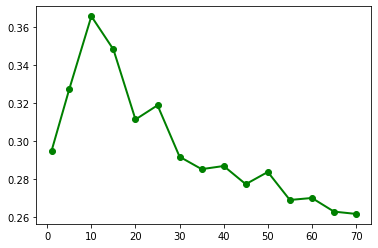

In [ ]:
import matplotlib.pyplot as plt
#coherence_val, topicnums
plt.plot(topicnums, coherence_val, 'go-', label='line 1', linewidth=2)
plt.show()

In [ ]:
coherence_val

[0.29506118094227707,
 0.32741604257305734,
 0.3656936299167354,
 0.34821401017361503,
 0.31137669858440964,
 0.3188558997572673,
 0.29178490866273704,
 0.28525123340408204,
 0.286905309967944,
 0.2773425075253943,
 0.283770220388404,
 0.26903864235318126,
 0.27008488163150235,
 0.2629146136082968,
 0.26170011656740244]

#SVD with TF - IDF

In [ ]:
# preparing inputs for the LSI model
dictionary = corpora.Dictionary(text_tokenized)

In [ ]:
dictionary = corpora.Dictionary(text_tokenized)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 $
1 1
2 2
3 3
4 4
5 5
6 AND
7 Algorithm
8 Algorithms
9 Apache
10 Applications


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in text_tokenized]
# document-term frequency for first 2 documents
for doc in corpus[0:2]:
    print(doc,'\n')

[(0, 9), (1, 7), (2, 6), (3, 4), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 2), (13, 2), (14, 3), (15, 2), (16, 2), (17, 2), (18, 1), (19, 2), (20, 2), (21, 1), (22, 7), (23, 1), (24, 5), (25, 2), (26, 1), (27, 1), (28, 5), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 2), (41, 3), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 13), (51, 1), (52, 2), (53, 1), (54, 3), (55, 2), (56, 1), (57, 3), (58, 1), (59, 1), (60, 3), (61, 1), (62, 2), (63, 2), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 4), (71, 2), (72, 19), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 6), (79, 5), (80, 1), (81, 1), (82, 2), (83, 1), (84, 7), (85, 1), (86, 10), (87, 1), (88, 2), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 2), (97, 2), (98, 2), (99, 4), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 2), (110, 

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(1, 0.039963470986510034),
 (2, 0.03278520425447285),
 (3, 0.023420343154737133),
 (4, 0.007032388519338267),
 (5, 0.00988581639576041),
 (6, 0.0488740689624042),
 (7, 0.028971815310595152),
 (8, 0.04445277019898046),
 (9, 0.05484628130792674),
 (10, 0.018645865515356932),
 (11, 0.004663903601064943),
 (12, 0.06406064601180293),
 (13, 0.10226055464001431),
 (14, 0.05611502111792331),
 (15, 0.08887609714946978),
 (16, 0.07101162724820113),
 (17, 0.08043144468327287),
 (18, 0.03550581362410057),
 (19, 0.039062331279976346),
 (20, 0.08043144468327287),
 (21, 0.031522401507184696),
 (22, 0.10200738691268979),
 (23, 0.04132633941359593),
 (24, 0.10223766939452146),
 (25, 0.04012858495904417),
 (26, 0.038463298620711794),
 (28, 0.14109408649245464),
 (30, 0.00013238431718983032),
 (31, 0.051130277320007154),
 (32, 0.051130277320007154),
 (33, 0.10226055464001431),
 (34, 0.02017675467287957),
 (35, 0.10226055464001431),
 (36, 0.051130277320007154),
 (37, 0.06704698719272834),
 (38, 0.0469079

In [ ]:
lsimodel = LsiModel(corpus=corpus_tfidf, num_topics=10, id2word=dictionary)

In [ ]:
u_df = pd.DataFrame(data= lsimodel.projection.u)
# sort by column 0
u_df.sort_values(axis= 0, by= 0, ascending= False)

,0,1,2,3,4,5,6,7,8,9
494,2.229933e-01,-3.367357e-01,-3.347728e-01,3.218034e-02,-5.585391e-03,1.382870e-01,-3.440727e-01,-9.134875e-02,-2.073498e-02,1.035843e-01
203,1.344782e-01,1.110880e-02,1.064731e-02,7.414804e-03,2.566143e-02,1.368047e-02,-2.832484e-02,-4.879233e-02,3.367467e-02,-6.112334e-03
836,1.313677e-01,6.518398e-02,-3.790685e-02,9.574686e-04,-1.517699e-02,-4.775309e-02,8.162103e-02,3.533623e-02,-1.755994e-01,5.360734e-02
423,9.108548e-02,-1.716236e-01,-1.225561e-01,2.438463e-02,-8.062818e-04,6.435636e-02,-1.465223e-01,-3.289578e-02,7.333916e-03,1.031643e-01
657,9.007638e-02,-2.153731e-03,4.289236e-03,-1.730644e-03,-4.362610e-02,2.161964e-02,-1.984681e-02,4.886558e-03,8.681318e-03,2.949611e-02
...,...,...,...,...,...,...,...,...,...,...
40806,4.022445e-06,7.208732e-06,2.675758e-07,1.976053e-07,-2.396158e-07,-8.474984e-06,6.434248e-06,2.113427e-06,-1.769873e-05,3.734989e-06
23490,2.725949e-06,-2.332088e-06,-3.576387e-06,-8.711861e-06,-1.269629e-05,-1.674665e-05,7.668708e-06,-5.338671e-06,1.441085e-06,1.573088e-06
0,2.841043e-20,-2.744919e-17,-2.756269e-18,1.620115e-16,2.198208e-18,-4.188472e-17,3.130220e-17,-1.141386e-16,-1.604885e-16,4.857720e-17
27,-1.120883e-20,4.194128e-18,9.929526e-18,6.734966e-18,5.783133e-18,-7.724419e-18,1.875739e-17,3.420894e-18,3.569951e-17,2.512198e-17


In [ ]:
s_df = pd.DataFrame(data= lsimodel.projection.s)
s_df

,0
0,9.692967
1,5.434467
2,4.839865
3,4.622731
4,4.432120
5,4.390798
6,4.214032
7,4.104589
8,3.986005
9,3.886802


In [ ]:
lsimodel.show_topics(num_topics=10)

[(0,
  '0.223*"data" + 0.134*"module" + 0.131*"week" + 0.091*"Data" + 0.090*"You" + 0.090*"business" + 0.078*"We" + 0.077*"project" + 0.077*"health" + 0.077*"Module"'),
 (1,
  '-0.337*"data" + -0.285*"Azure" + -0.223*"Cloud" + -0.178*"IBM" + -0.172*"Data" + -0.165*"Python" + -0.156*"AI" + -0.140*"cloud" + -0.139*"machine" + -0.139*"Google"'),
 (2,
  '0.362*"Cloud" + -0.335*"data" + 0.291*"Azure" + 0.220*"Google" + 0.209*"cloud" + 0.170*"AWS" + -0.148*"Python" + -0.137*"regression" + 0.132*"security" + 0.128*"Microsoft"'),
 (3,
  '0.691*"Azure" + 0.299*"Microsoft" + -0.250*"Cloud" + -0.175*"Google" + -0.115*"AWS" + -0.111*"IBM" + -0.094*"Meta" + -0.091*"Python" + 0.090*"exam" + 0.089*"health"'),
 (4,
  '0.341*"health" + -0.266*"Meta" + -0.217*"marketing" + 0.188*"Cloud" + 0.162*"healthcare" + -0.155*"Azure" + 0.153*"AI" + -0.142*"Marketing" + -0.133*"Android" + 0.128*"care"'),
 (5,
  '0.249*"marketing" + -0.243*"health" + -0.200*"Azure" + 0.174*"financial" + 0.151*"Marketing" + 0.143*"b

In [ ]:
lsitopics = [[word for word, prob in topic]
             for topicid, topic in lsimodel.show_topics(formatted=False)]

coherence_model_lsi = CoherenceModel(model=lsimodel, texts=text_tokenized, dictionary=dictionary, coherence='c_v', topics = lsitopics)
lsi_coherence = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', lsi_coherence)


Coherence Score:  0.4224087257362753


In [ ]:
query = 'Digital marketing courses'
vec_bow = dictionary.doc2bow(clean_text(query).split())
tfidf_vector = tfidf[vec_bow]
tfidf_vector_ordered = sorted(tfidf_vector, key=lambda x: x[1], reverse=True)
# convert the query to LSI space
vec_lsi = lsimodel[tfidf_vector_ordered]  
# # This shows how the query relates to the 10 topics
vec_lsi 

[(0, 0.07894260491208333),
 (1, 0.07996372001245673),
 (2, 0.07791712264983551),
 (3, 0.023514870703376135),
 (4, -0.19214872023585994),
 (5, 0.22977634622510207),
 (6, -0.16157878057686403),
 (7, 0.2539301557872418),
 (8, -0.12065760600249076),
 (9, -0.062148331744109456)]

In [ ]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsimodel[corpus_tfidf]) # transform corpus to LSI space and index it
# index.save('/tmp/deerwester.index')
# index = similarities.MatrixSimilarity.load('/tmp/deerwester.index')

In [ ]:
course_clean = list(course_clean)

In [ ]:
sims = index[vec_lsi]  # perform a similarity query against the corpus

recommendation_scores = []
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print("Similarity of query:",query,"\n")
for i, s in enumerate(sims):
  course_num = s[0]
  # print('doc number:',s[0],'   has similarity of',s[1])
  recommendation_score = [course_clean[int(course_num)].split('$')[0], s[1]]
  recommendation_scores.append(recommendation_score)

recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)
print('Here are your recommendations for your book.')
display(recommendation[:11])

Similarity of query: Digital marketing courses 

Here are your recommendations for your book.


[['Reimagining Consumer Experience ', 0.980366],
 ['Social Media Digital Marketing Fundamentals ', 0.97744775],
 ['Reshaping Consumer Search ', 0.9741549],
 ['Digital Media Marketing Principles ', 0.9738636],
 ['Digital Channel Planning E Commerce Strategy ', 0.97279227],
 ['Digital Strategy Business Opportunity ', 0.97121924],
 ['Digital Media Marketing Strategies ', 0.9704884],
 ['Facebook Instagram Snapchat Marketing ', 0.9695494],
 ['Sports Marketing ', 0.9634484],
 ['Foundations Digital Marketing E commerce ', 0.9632232],
 ['Think Outside Inbox Email Marketing ', 0.96192884]]

## Hyperparameter Tuning

In [ ]:
from gensim import corpora, models, similarities
import random
import os
from gensim.models import CoherenceModel
coherence_val_tfidf = []
topicnums = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

svdmodels_tfidf = {}
for i in topicnums:
    random.seed(42)
    if not os.path.exists('/content/drive/MyDrive/DSCI:560 Project/svd_models_tfidf/svdmodels_tfidf_'+str(i)+'.svd'):
        %time svdmodels_tfidf[i] = LsiModel(corpus=corpus_tfidf, num_topics=i, id2word=dictionary)
        svdmodels_tfidf[i].save('/content/drive/MyDrive/DSCI:560 Project/svd_models_tfidf/svdmodels_tfidf_'+str(i)+'.svd')
        print('svdmodels_tfidf{}.svd created.'.format(i))
        coherence_model_svd_tfidf = CoherenceModel(model=svdmodels_tfidf[i], texts=text_tokenized, dictionary=dictionary, coherence='c_v')
        coherence_tfidf = coherence_model_svd_tfidf.get_coherence()
        print('Coherence Score: ', coherence_tfidf)
        coherence_val_tfidf.append(coherence_tfidf)
    else: 
        print('svdmodels_tfidf{}.svd already exists.'.format(i))

CPU times: user 10.5 s, sys: 712 ms, total: 11.3 s
Wall time: 9.92 s
svdmodels_tfidf1.svd created.
Coherence Score:  0.3383365364146953
CPU times: user 11.2 s, sys: 1.12 s, total: 12.3 s
Wall time: 11.6 s
svdmodels_tfidf5.svd created.
Coherence Score:  0.4296995053051453
CPU times: user 11 s, sys: 806 ms, total: 11.8 s
Wall time: 9.18 s
svdmodels_tfidf10.svd created.
Coherence Score:  0.4513375549894586
CPU times: user 12.5 s, sys: 784 ms, total: 13.3 s
Wall time: 10.4 s
svdmodels_tfidf15.svd created.
Coherence Score:  0.3974088635051966
CPU times: user 11.9 s, sys: 839 ms, total: 12.8 s
Wall time: 13.5 s
svdmodels_tfidf20.svd created.
Coherence Score:  0.3685745210805211
CPU times: user 12.2 s, sys: 814 ms, total: 13 s
Wall time: 9.45 s
svdmodels_tfidf25.svd created.
Coherence Score:  0.3469473912663723
CPU times: user 10.8 s, sys: 1.23 s, total: 12.1 s
Wall time: 10.2 s
svdmodels_tfidf30.svd created.
Coherence Score:  0.346822855482052
CPU times: user 11 s, sys: 685 ms, total: 11.7 s

In [ ]:
import pickle
svd_topics = {}
for i in topicnums:
    svd_model = LsiModel.load('/content/drive/MyDrive/DSCI:560 Project/svd_models_tfidf/svdmodels_tfidf_'+str(i)+'.svd')
    svd_topics_string = svd_model.show_topics(i)
    svd_topics[i] = ["".join([c if c.isalpha() else " " for c in topic[1]]).split() for topic in svd_topics_string]

pickle.dump(svd_topics,open('/content/drive/MyDrive/DSCI:560 Project/svd_models_tfidf/pub_svd_tfidf_topics.pkl','wb'))

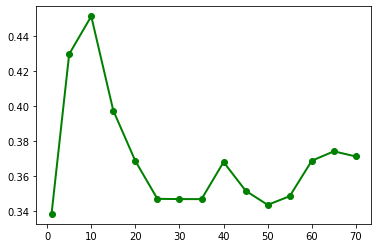

In [ ]:
import matplotlib.pyplot as plt
#coherence_val, topicnums
plt.plot(topicnums, coherence_val_tfidf, 'go-', label='line 1', linewidth=2)
plt.show()

In [ ]:
coherence_val_tfidf

[0.3383365364146953,
 0.4296995053051453,
 0.4513375549894586,
 0.3974088635051966,
 0.3685745210805211,
 0.3469473912663723,
 0.346822855482052,
 0.346794575584143,
 0.36798150325631757,
 0.35159586913083174,
 0.3435026649681819,
 0.34848559224734005,
 0.3687433669948111,
 0.3741140625039322,
 0.37117680408748344]